# Example callback

In [1]:
import pickle
import sys
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
from tqdm.auto import tqdm
import os

sys.path.append("../covid19_inference")

import covid19_inference as cov19

%load_ext autoreload
%autoreload 2

## Test model

In [2]:
import pymc3 as pm
X = np.array([1, 2, 3, 4, 5])
y = X * 2 + np.random.randn(len(X))
with pm.Model() as model:
    
    intercept = pm.Normal('intercept', 0, 10)
    slope = pm.Normal('slope', 0, 10)
    
    mean = intercept + slope * X
    error = pm.HalfCauchy('error', 1)
    obs = pm.Normal('obs', mean, error, observed=y)

## Adding callback

Tuning was enabled throughout the whole trace.
WARNING  [pymc3] Tuning was enabled throughout the whole trace.
Multiprocess sampling (16 chains in 4 jobs)
INFO     [pymc3] Multiprocess sampling (16 chains in 4 jobs)
NUTS: [error, slope, intercept]
INFO     [pymc3] NUTS: [error, slope, intercept]


Sampling 16 chains for 10 tune and 0 draw iterations (160 + 0 draws total) took 8 seconds.
INFO     [pymc3] Sampling 16 chains for 10 tune and 0 draw iterations (160 + 0 draws total) took 8 seconds.
/home/sebastian/anaconda3/lib/python3.7/site-packages/arviz/data/base.py:174: UserWarning: More chains (16) than draws (10). Passed array should have shape (chains, draws, *shape)
  UserWarning,
INFO     [covid19_inference.sampling] Num chains kept: 4/16
Only 20 samples in chain.
WARNING  [pymc3] Only 20 samples in chain.
Multiprocess sampling (4 chains in 4 jobs)
INFO     [pymc3] Multiprocess sampling (4 chains in 4 jobs)
NUTS: [error, slope, intercept]
INFO     [pymc3] NUTS: [error, slope, intercept]


Sampling 4 chains for 10 tune and 20 draw iterations (40 + 80 draws total) took 7 seconds.
INFO     [pymc3] Sampling 4 chains for 10 tune and 20 draw iterations (40 + 80 draws total) took 7 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
ERROR    [pymc3] There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


(<MultiTrace: 4 chains, 30 iterations, 4 variables>,
 Inference data with groups:
 	> posterior
 	> log_likelihood
 	> sample_stats
 	> observed_data
 
 Warmup iterations saved (warmup_*).)

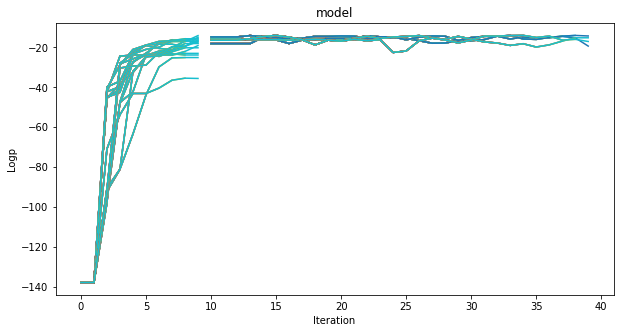

In [3]:
callback = cov19.sampling.Callback(path="./test/", n=1)

cov19.sampling.robust_sample(model,10,20,16,4,tune_2nd=10, callback=callback)

Trace from tuning is merged with warmup

array([[<AxesSubplot:title={'center':'intercept'}>,
        <AxesSubplot:title={'center':'intercept'}>],
       [<AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'slope'}>],
       [<AxesSubplot:title={'center':'error'}>,
        <AxesSubplot:title={'center':'error'}>]], dtype=object)

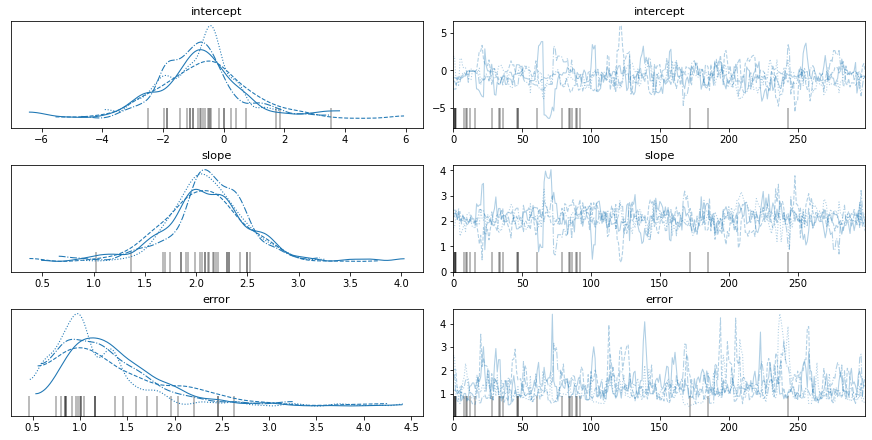